# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
X = np.genfromtxt('/content/drive/MyDrive/Master 1/Apprentissage Automatique et Réseaux de Neurones/TP8/X.csv', delimiter=',', dtype=float)

y = np.genfromtxt('/content/drive/MyDrive/Master 1/Apprentissage Automatique et Réseaux de Neurones/TP8/yval.csv', delimiter=',', dtype=float)

X.shape, y.shape

((307, 2), (307,))

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


In [ ]:
x1 = np.genfromtxt('/content/drive/MyDrive/Master 1/Apprentissage Automatique et Réseaux de Neurones/TP8/Xval.csv', delimiter=',', dtype=float)

# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

In [ ]:
X[:10, 1]

array([14.741, 13.763, 15.853, 16.174, 14.043, 13.406, 14.223, 15.892,
       16.203, 14.899])

In [ ]:
x1[:10, 1]

array([14.921, 15.33 , 16.474, 13.989, 15.635, 16.14 , 15.175, 15.432,
       14.306, 14.901])

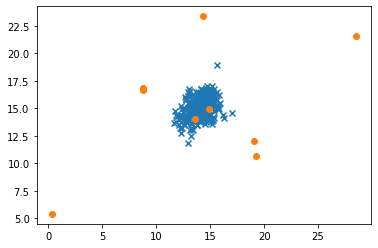

In [ ]:
plt.scatter(x1[np.where(y==0),0],x1[np.where(y==0),1], marker ='x')
plt.scatter(x1[np.where(y==1),0],x1[np.where(y==1),1], marker ='o')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [ ]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)
m, v

(array([14.11225277, 14.99767459]), array([1.8326777 , 1.70971534]))

In [ ]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

In [ ]:
prob = calculProba(x1, m, v)

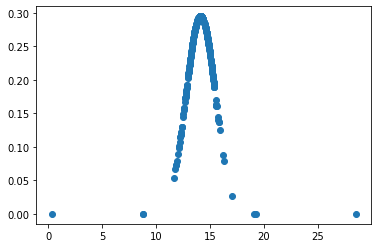

In [ ]:
plt.scatter(x1[:,0],prob[:,0])

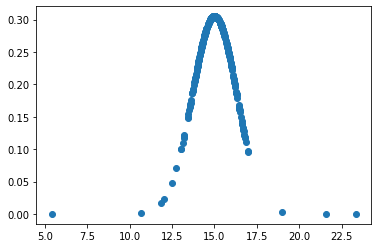

In [ ]:
plt.scatter(x1[:,1],prob[:,1])

best epsilon :  0.0001  current best f1 score :  0.8750000000000001


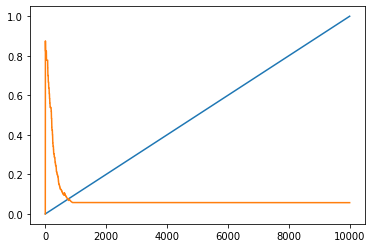

In [ ]:
f1_scores = []
proba = calculProba(x1, m, v)
yproba = proba[:,0]*proba[:,1]
best_epsilon,best_f_score = 0,0
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    current_f_score = f1_score(y, y_pred)
    if current_f_score > best_f_score :
        best_f_score = current_f_score
        best_epsilon = epsilon
    f1_scores.append((epsilon, f1_score(y, y_pred)))
plt.plot(f1_scores)
print("best epsilon : ",best_epsilon, " current best f1 score : ",best_f_score )

# Gaussian Multivariée

In [ ]:
sigma = np.cov(X.T)

mu = np.mean(X,axis=0)
mu, sigma

(array([14.11225277, 14.99767459]), array([[ 1.83866684, -0.22783493],
        [-0.22783493,  1.71530264]]))

In [ ]:
def calcul_proba_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = np.linalg.det(sigma)
        if det == 0:
            print("le determinent de la matrice sigma ne peut pas être de 0")
            return

        norm_const = 1.0/ ( np.math.pow((2*np.pi),float(size)/2) * np.math.pow(det,1.0/2) )
        x_mu = x - mu
        inv = np.linalg.inv(sigma)   
        result = np.math.pow(np.e, -0.5 * (x_mu @ inv @ x_mu.T))
        return norm_const * result
    else:
        print("Dimentions différentes")
        return

best epsilon multivar :  0.0001   best f1 score multivar :  0.8


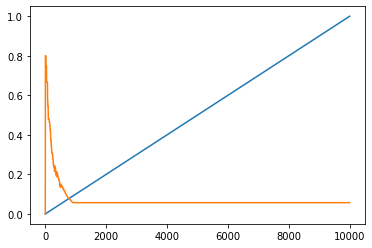

In [ ]:
f1_scores = []
yproba = np.array([calcul_proba_multivariate(x, mu, sigma)for x in X])
best_epsilon_multivar,best_f_score_multivar = 0,0
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    current_f_score = f1_score(y, y_pred)
    if current_f_score > best_f_score_multivar :
        best_f_score_multivar = current_f_score
        best_epsilon_multivar = epsilon
    f1_scores.append((epsilon, current_f_score))
plt.plot(f1_scores)
print("best epsilon multivar : ",best_epsilon_multivar, "  best f1 score multivar : ",best_f_score_multivar )

## Visualisation 3D

Gaussiennes Univariées

In [ ]:
import matplotlib.ticker as tick

In [ ]:
def y_fmt(x, y):
    return '{:2.2e}'.format(x).replace('e', 'x10^')

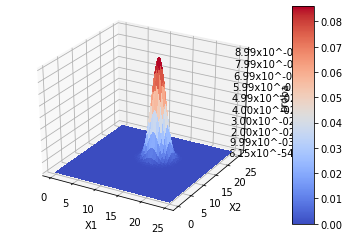

In [ ]:
X1 = np.linspace(0,25,1000)
X2 = np.linspace(0,25,1000)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X1,X2 = np.meshgrid(X1,X2)

ZZU = calculProba(np.c_[X1.ravel(),X2.ravel()],m,v)
ZZU = ZZU[:,0]*ZZU[:,1]
ZZU = ZZU.reshape(X1.shape)

# Plot the surface.
surf = ax.plot_surface(X1, X2, ZZU, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel("proba")
# Customize the z axis.

ax.zaxis.set_major_locator(plt.LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

# Add a color bar which maps values to colors.
fig.colorbar(surf, aspect=10)

plt.show()

gaussienne multivariée

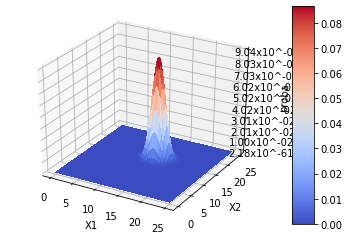

In [ ]:
X1 = np.linspace(0,25,1000)
X2 = np.linspace(0,25,1000)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X1,X2 = np.meshgrid(X1,X2)

ZZM = np.array([calcul_proba_multivariate(x, mu, sigma)for x in np.c_[X1.ravel(),X2.ravel()]])
ZZM = ZZM.reshape(X1.shape)

# Plot the surface.
surf = ax.plot_surface(X1, X2, ZZM, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel("proba")
# Customize the z axis.

ax.zaxis.set_major_locator(plt.LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

# Add a color bar which maps values to colors.
fig.colorbar(surf, aspect=10)

plt.show()

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance